<a href="https://colab.research.google.com/github/Louis5228/Digital-Image-Process/blob/main/Color_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Digital Image Process/HW4")

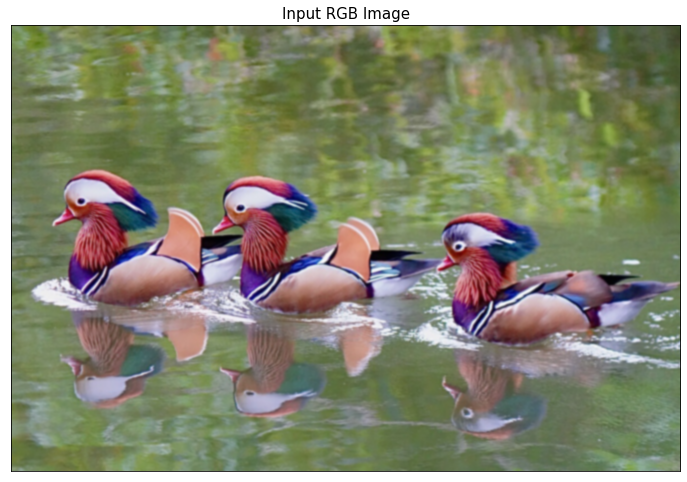

In [75]:
# load image
img = cv2.imread('Bird 3 blurred.tif')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.title('Input RGB Image', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(show_img)
plt.show()

In [76]:
## Calculate RGB components
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

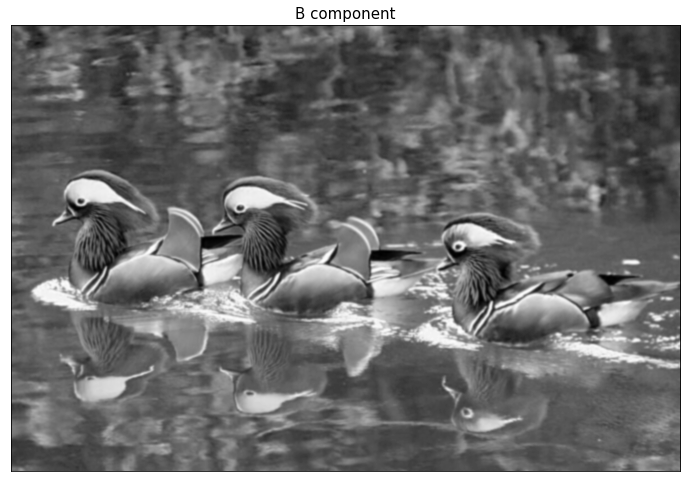

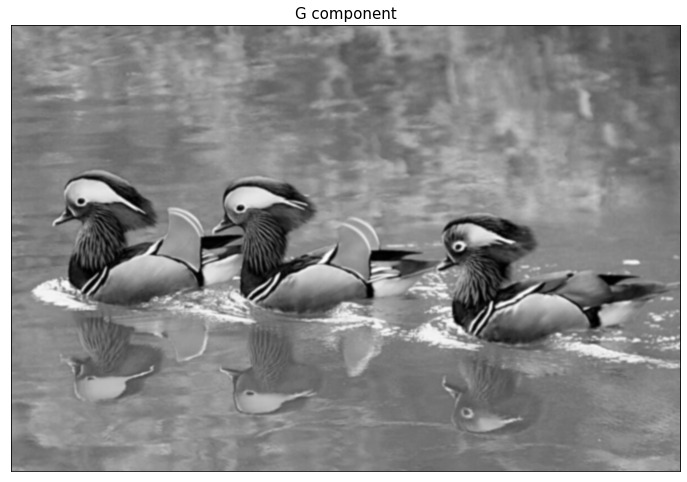

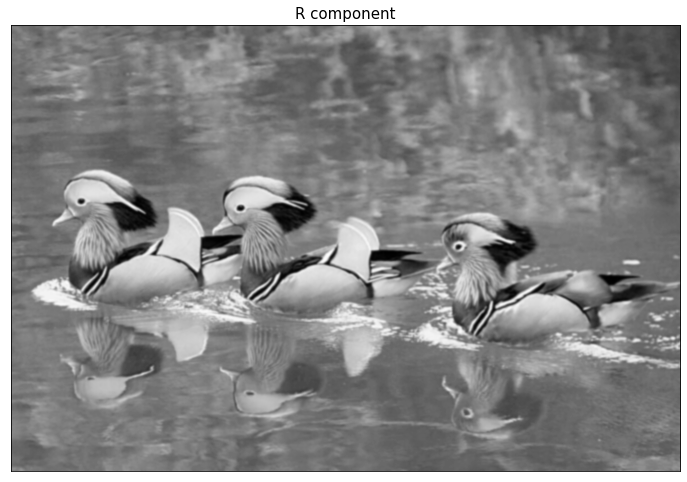

In [77]:
plt.figure(figsize=(12,12))
plt.title('B component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(b, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('G component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(g, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('R component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(r, cmap = 'gray')
plt.show()

In [ ]:
## Convert RGB to HSI
b_ = b / 255.0
g_ = g / 255.0
r_ = r / 255.0

hsi_img = np.zeros(img.shape)

for k in range(img.shape[0]):
  for j in range(img.shape[1]):

    ## Calculate Hue
    num = 0.5 * ((r_[k][j] - g_[k][j]) + (r_[k][j] - b_[k][j]))
    den = math.sqrt((r_[k][j] - g_[k][j])**2 + ((r_[k][j] - b_[k][j]) * (g_[k][j] - b_[k][j])))
    theta = math.acos(num / den)
    if den == 0.0:
      H = 0
    elif b_[k][j] <= g_[k][j]:
      H = theta
    else:
      H = 2*math.pi - theta
    H = H / (2*math.pi)

    ## Calculate Saturation
    rgb_minimum = min(b_[k][j], g_[k][j], r_[k][j])
    sum = b_[k][j] + g_[k][j] + r_[k][j]
    if sum == 0:
      S = 0
    else:
      S = 1 - (3.0 / (r_[k][j] + g_[k][j] + b_[k][j]) * rgb_minimum)

    ## Calculate Intensity
    I = sum / 3.0
    
    hsi_img[k, j, 0] = H * 255.0
    hsi_img[k, j, 1] = S * 255.0
    hsi_img[k, j, 2] = I * 255.0

## Calculate HSI components
h = hsi_img[:,:,0]
s = hsi_img[:,:,1]
i = hsi_img[:,:,2]

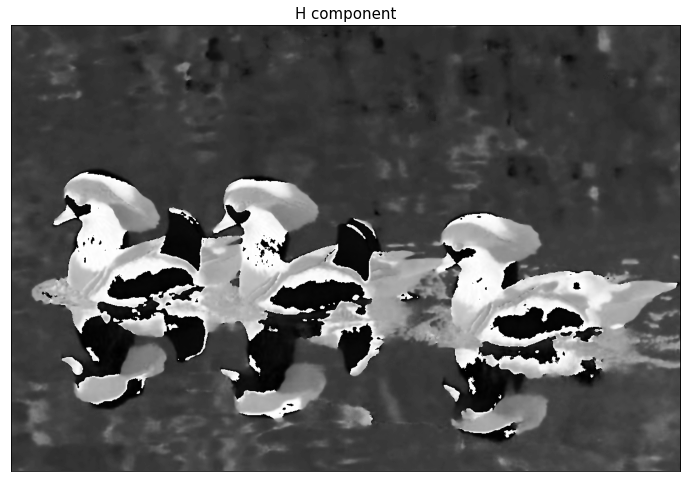

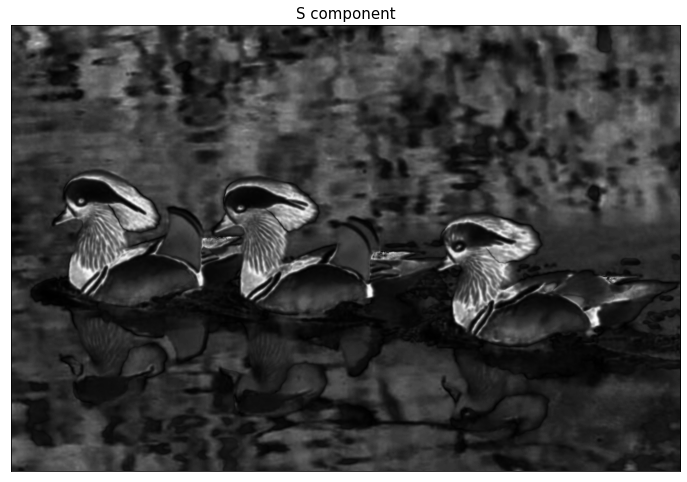

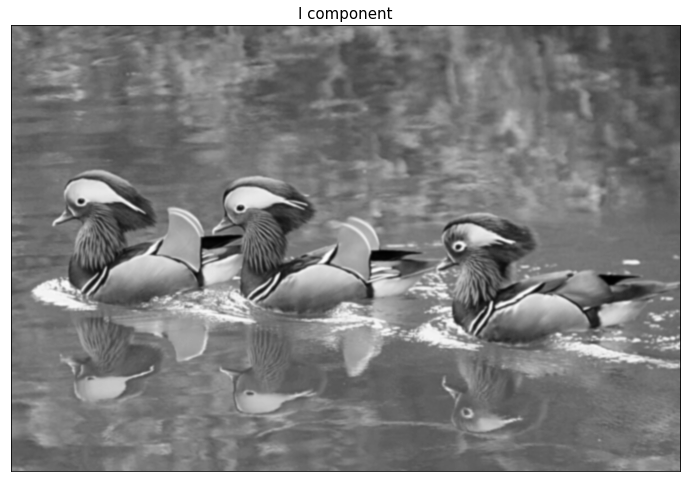

In [79]:
plt.figure(figsize=(12,12))
plt.title('H component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(h, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('S component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(s, cmap = 'gray')
plt.show()
plt.figure(figsize=(12,12))
plt.title('I component', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(i, cmap = 'gray')
plt.show()

In [80]:
## Sharpen images with kernal
kernal = np.array(([-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]))

shrp_RGB = cv2.filter2D(img, -1, kernal)
shrp_I = cv2.filter2D(i, -1, kernal)
# shrp_HSI = cv2.filter2D(hsi_img, -1, kernal)

## Convert HSI to RGB
shrp_HSI2RGB = np.zeros(img.shape)
h_ = (h / 255.0) * 2*math.pi
s_ =  s / 255.0
i_ =  shrp_I / 255.0
# i_ =  shrp_HSI[:,:,2] / 255.0

for k in range(img.shape[0]):
  for j in range(img.shape[1]):
    if (h_[k][j] >= 0 and h_[k][j] < (2*math.pi / 3)):
      B = i_[k][j] * (1 - s_[k][j])
      R = i_[k][j] * (1 + s_[k][j]*math.cos(h_[k][j]) / math.cos(math.pi/3 - h_[k][j]))
      G = 3 * i_[k][j] - (R + B)
    elif (h_[k][j] >= (2*math.pi / 3) and h_[k][j] < (4*math.pi / 3)):
      h_[k][j] = h_[k][j] - (2*math.pi / 3)
      R = i_[k][j] * (1 - s_[k][j])
      G = i_[k][j] * (1 + s_[k][j]*math.cos(h_[k][j]) / math.cos(math.pi/3 - h_[k][j]))
      B = 3 * i_[k][j] - (R + G)
    elif (h_[k][j] >= (4*math.pi / 3) and h_[k][j] < (2*math.pi)):
      h_[k][j] = h_[k][j] - (4*math.pi / 3)
      G = i_[k][j] * (1 - s_[k][j])
      B = i_[k][j] * (1 + s_[k][j]*math.cos(h_[k][j]) / math.cos(math.pi/3 - h_[k][j]))
      R = 3 * i_[k][j] - (G + B)
    
    shrp_HSI2RGB[k, j, 0] = B * 255.0
    shrp_HSI2RGB[k, j, 1] = G * 255.0
    shrp_HSI2RGB[k, j, 2] = R * 255.0

Figure of RGB-based Sharpened Image


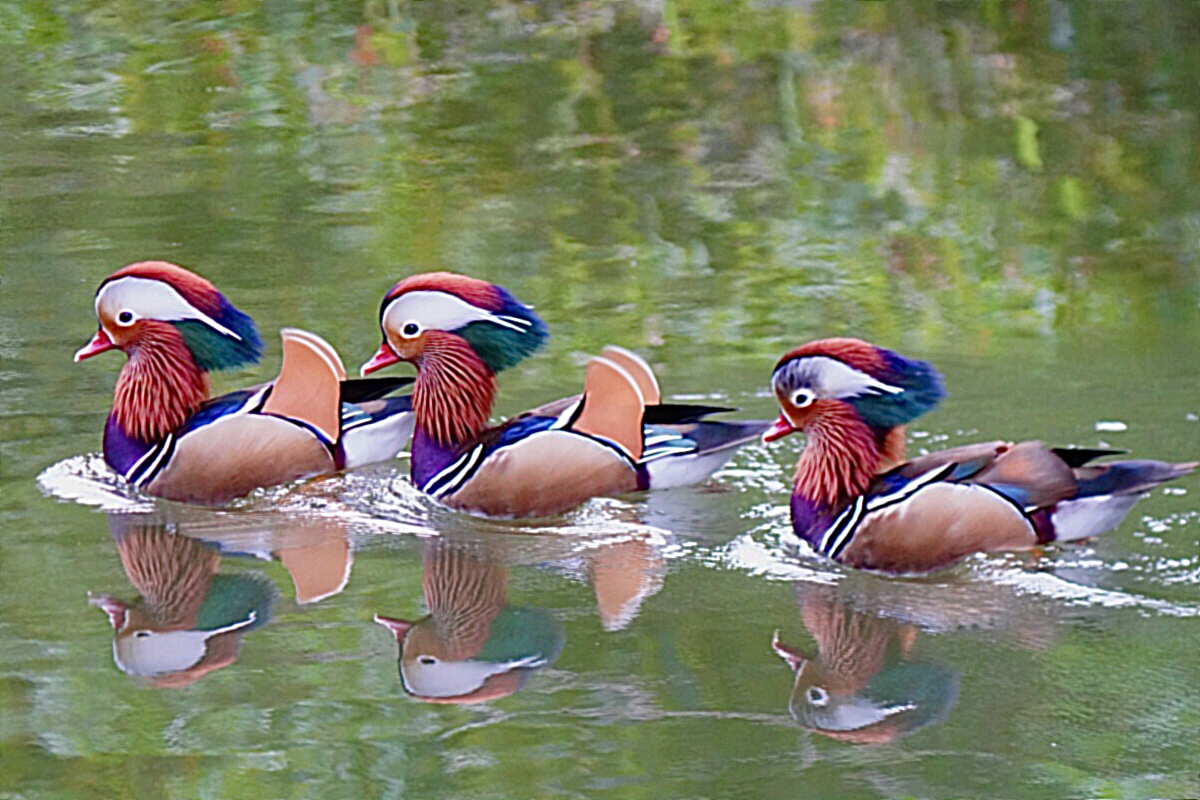




Figure of HSI-based Sharpened Image


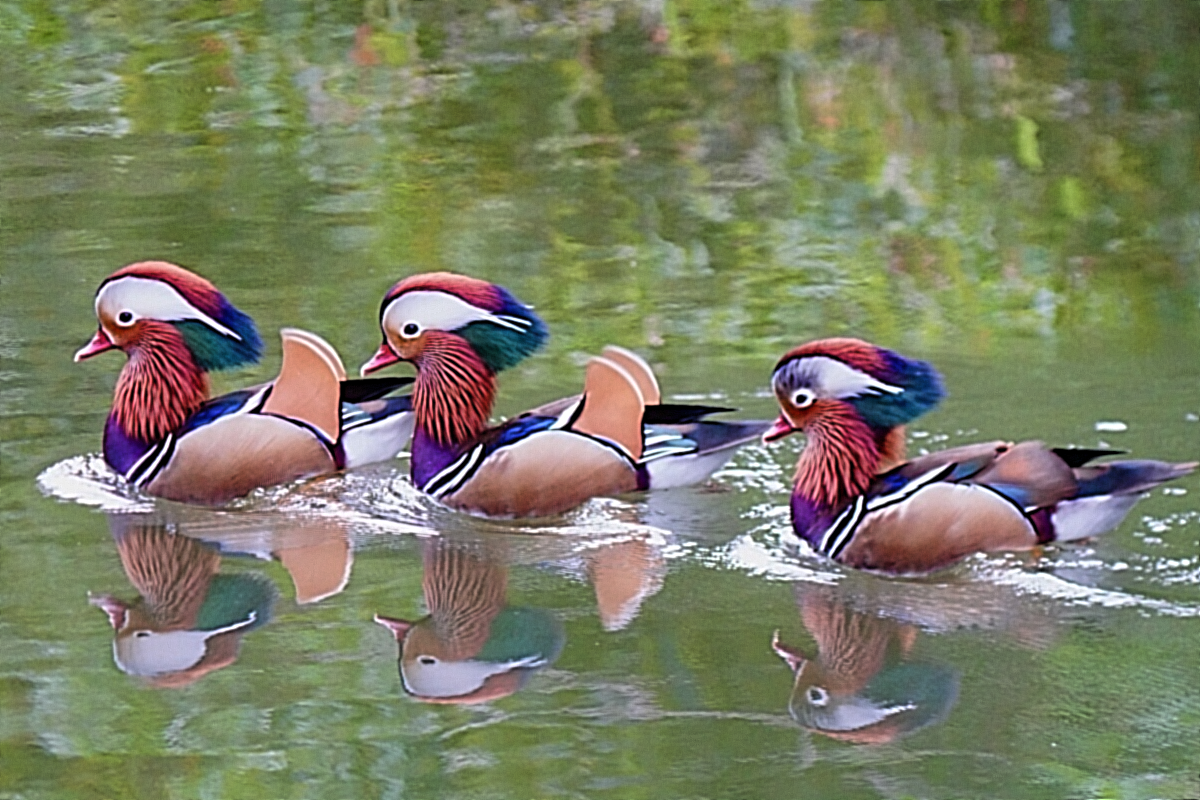

In [81]:
# plt.figure(figsize=(12,12))
# plt.title('Figure of RGB-based Sharpened Image', fontsize = 15), plt.xticks([]), plt.yticks([])
# show_shrp_RGB = cv2.cvtColor(shrp_RGB, cv2.COLOR_BGR2RGB)
# plt.imshow(show_shrp_RGB)
# plt.show()
# plt.figure(figsize=(12,12))
# plt.title('Figure of HSI-based Sharpened Image', fontsize = 15), plt.xticks([]), plt.yticks([])
# show_shrp_HSI2RGB = cv2.cvtColor(shrp_HSI2RGB, cv2.COLOR_BGR2RGB)
# plt.imshow(show_shrp_HSI2RGB)
# plt.show()
print('Figure of RGB-based Sharpened Image')
cv2_imshow(shrp_RGB)
print('\n\n')
print('Figure of HSI-based Sharpened Image')
cv2_imshow(shrp_HSI2RGB)

Difference between RGB-based and HSI-based sharpened images


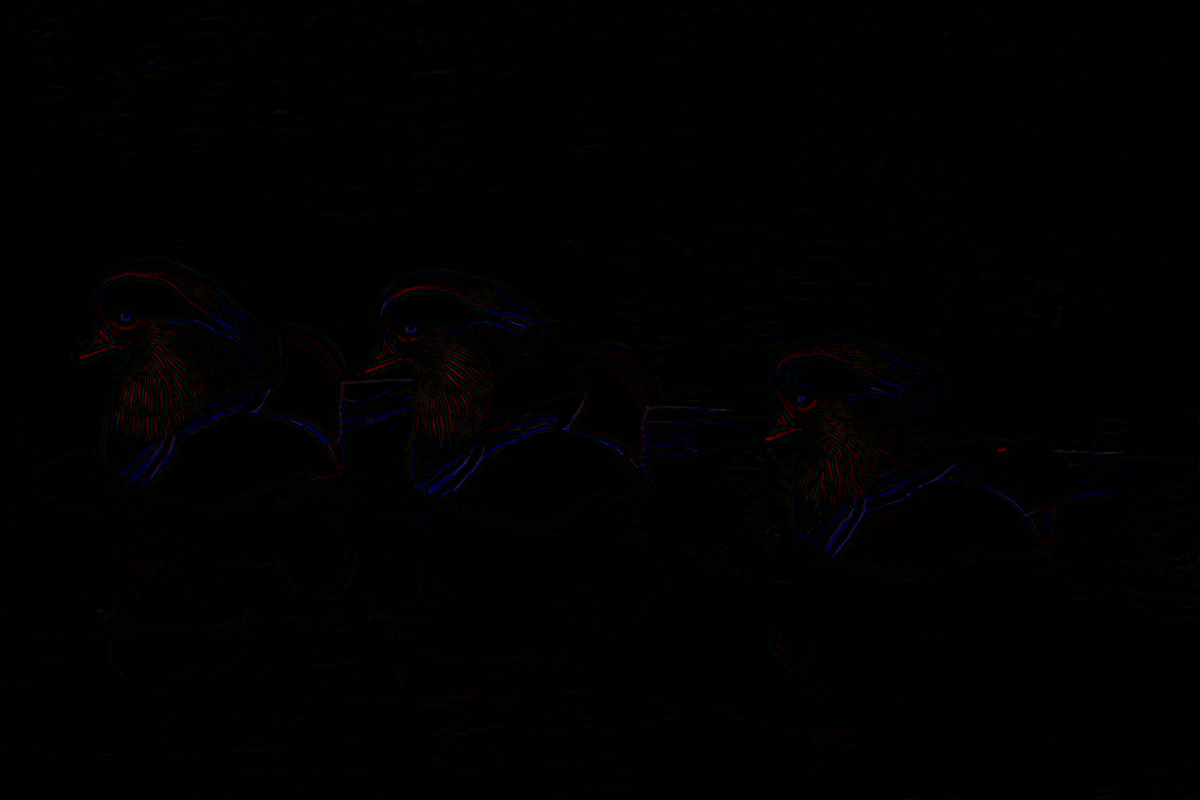

In [82]:
print('Difference between RGB-based and HSI-based sharpened images')
diff = shrp_RGB - shrp_HSI2RGB
cv2_imshow(diff)